In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.graphics.tsaplots import plot_acf
import datetime
from datetime import datetime
from datetime import timedelta 

In [10]:
df_2022_2024 = pd.read_csv("data/2022-2024_Stats.csv")
df_2022_2024

Date  Open Balances  Closed  New Cases
0    2022-01-01           1963       0        468
1    2022-01-02           2431       0        503
2    2022-01-03           2934     857       1212
3    2022-01-04           3146     727       1039
4    2022-01-05           3368     949        826
..          ...            ...     ...        ...
810  2024-03-21           2521     429        428
811  2024-03-22           2499     432        406
812  2024-03-23           2473      11        211
813  2024-03-24           2673       0        214
814  2024-03-25           2737     466        445

[815 rows x 4 columns]

In [3]:
df_2022_2024.set_index('Date', inplace=True)

train_data, test_data = df_2022_2024[0:int(len(df_2022_2024)*0.9)], df_2022_2024[int(len(df_2022_2024)*0.9):]

train_arima = train_data['Open Balances']
test_arima = test_data['Open Balances']

# ARIMA Model

In [7]:
# Initialize history with training data
history = [x for x in train_arima]
y = test_arima
predictions = list()
residuals = list()  # List to store residuals

# Iterate over test data to make predictions
for i in range(0, len(y)):
    model = ARIMA(history, order=(7,1,1)) # p, d, q
    model_fit = model.fit()
    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions.append(yhat)
    # Get the observation from test data
    obs = y[i]
    # Calculate residual
    residual = obs - yhat
    residuals.append(residual)
    # Update the history with the observation
    history.append(obs)

In [11]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

mean_actual_values = y.mean()
error_percentage = (mae / mean_actual_values) * 100
print("Measure error compared to the scale of actual values :", error_percentage)

MSE: 15319.156322274981
MAE: 99.05996888336638
RMSE: 123.77057938894437
Measure error compared to the scale of actual values : 4.468297182703142


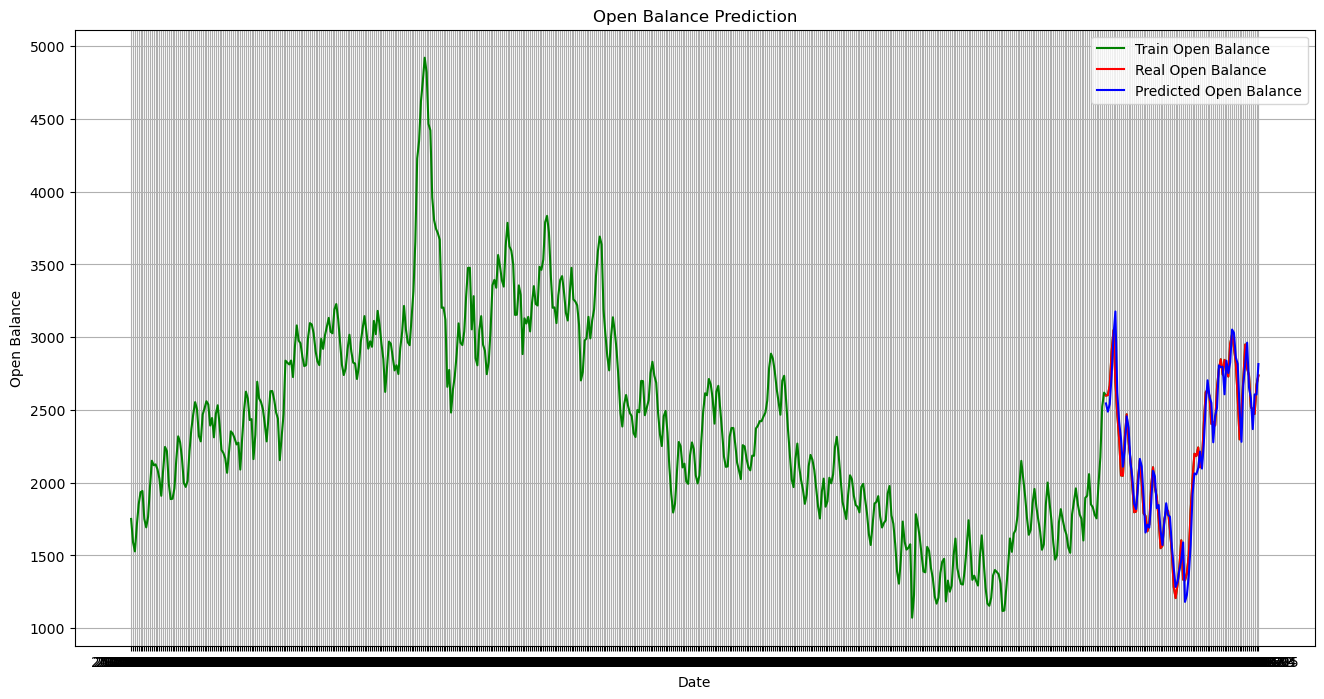

In [12]:
plt.figure(figsize=(16,8))
plt.plot(df_2022_2024.index[-600:], df_2022_2024['Open Balances'].tail(600), color='green', label = 'Train Open Balance')
plt.plot(test_data.index, y, color = 'red', label = 'Real Open Balance')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Open Balance')
plt.title('Open Balance Prediction')
plt.xlabel('Date')
plt.ylabel('Open Balance')
plt.legend()
plt.grid(True)
plt.show()

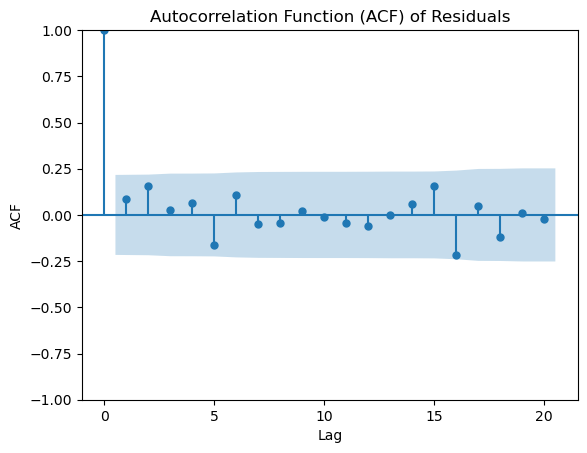

In [13]:
plot_acf(residuals, lags=20)  # Adjust 'lags' as needed
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

## Predicting for 2024, by Week

In [4]:
last_2_months = df_2022_2024[-90:-30]
print(len(last_2_months))

60


In [5]:
# Combine training data from 2022 and 2023
combined_train_data = last_2_months['Open Balances'] # Assuming test_arima contains data for 2022 and 2023

# Initialize history with combined training data
history = [x for x in combined_train_data]

predictions_2024 = list()


# Number of time steps to forecast for 2024
num_steps_2024 = 7

# Iterate over the number of time steps to make predictions for 2024
for i in range(num_steps_2024):
    # Fit ARIMA model with seasonal differencing
    model = ARIMA(history, order=(7, 1, 1)) # 7, 1, 1 is the best combination
    model_fit = model.fit()
    
    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions_2024.append(yhat)
    
    # Update the history with the forecasted value
    history.append(yhat)

# Now predictions_2024 contains the predicted values for 2024

print(predictions_2024)

[2319.012550019357, 2443.0052824526388, 2546.464894383875, 2554.302971585926, 2537.1875834820125, 2450.0301150081277, 2469.436017403528]


In [2]:
# Assuming your original data is in a pandas Series or DataFrame format
# and the index is a datetime index
# Create a time index for the 2024 period
start_date_2024 = pd.Timestamp('2024-02-25')
end_date_2024 = start_date_2024 + timedelta(days=6)
time_index_2024 = pd.date_range(start=start_date_2024, end=end_date_2024, freq='D')

filtered_values = df_2022_2024.loc[str(start_date_2024.date()):str(end_date_2024.date()), 'Open Balances']

# # Plotting
plt.figure(figsize=(10, 6))

plt.plot(time_index_2024, filtered_values, label='Correct 2024', color='blue')

# Plot predicted values for 2024
plt.plot(time_index_2024, predictions_2024, label='Predictions 2024', color='red')

plt.title('2024 Predictions')
plt.xlabel('Date')
plt.ylabel('Open Balance')
plt.legend()
plt.grid(True)
plt.show()

# report performance
mse = mean_squared_error(filtered_values, predictions_2024)
print('MSE: '+str(mse))
mae = mean_absolute_error(filtered_values, predictions_2024)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(filtered_values, predictions_2024))
print('RMSE: '+str(rmse))

mean_actual_values = filtered_values.mean()
error_percentage = (mae / mean_actual_values) * 100
print("Measure error compared to the scale of actual values :", error_percentage)

NameError: name 'pd' is not defined

## Predicting for 2024, by Month

In [7]:
last_100_days = df_2022_2024[-130:-30]
print(len(last_100_days))

100


In [8]:
# Combine training data from 2022 and 2023
combined_train_data = last_100_days['Open Balances'] # Assuming test_arima contains data for 2022 and 2023

# Initialize history with combined training data
history = [x for x in combined_train_data]

predictions_2024 = list()


# Number of time steps to forecast for 2024
num_steps_2024 = 30

# Iterate over the number of time steps to make predictions for 2024
for i in range(num_steps_2024):
    # Fit ARIMA model with seasonal differencing
    model = ARIMA(history, order=(7, 1, 1)) # 7, 1, 0 is the best combination
    model_fit = model.fit()
    
    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions_2024.append(yhat)
    
    # Update the history with the forecasted value
    history.append(yhat)

# Now predictions_2024 contains the predicted values for 2024

print(predictions_2024)

[2310.3908605415027, 2442.1285856952577, 2550.0566774702684, 2541.1237203262754, 2535.0970020431387, 2417.3723961642877, 2425.015377210721, 2504.4318934284975, 2594.66849150132, 2670.1428948365465, 2671.0389221186333, 2646.4437959086486, 2555.084217181012, 2545.3649544011346, 2583.2964204040854, 2647.87158867249, 2704.94201711114, 2713.1856934441766, 2687.816401103672, 2619.875676906129, 2602.03262044935, 2618.493517586613, 2665.074485641766, 2709.7514990216137, 2722.1697430251374, 2701.969562346561, 2652.3718643866014, 2631.7164631511787, 2636.7677985515056, 2669.974501773713]


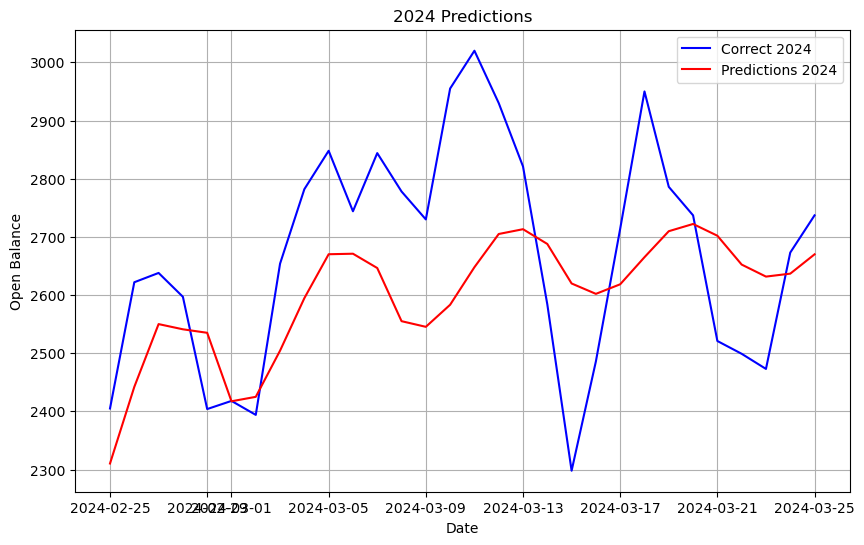

MSE: 31263.66900092048
MAE: 148.67067642639086
RMSE: 176.81535284279045
Measure error compared to the scale of actual values : 5.572224947892014


In [67]:
# Assuming your original data is in a pandas Series or DataFrame format
# and the index is a datetime index
# Create a time index for the 2024 period
start_date_2024 = pd.Timestamp('2024-02-25')
end_date_2024 = start_date_2024 + timedelta(days=29)
time_index_2024 = pd.date_range(start=start_date_2024, end=end_date_2024, freq='D')

filtered_values = df_2022_2024.loc[str(start_date_2024.date()):str(end_date_2024.date()), 'Open Balances']

# # Plotting
plt.figure(figsize=(10, 6))

plt.plot(time_index_2024, filtered_values, label='Correct 2024', color='blue')

# Plot predicted values for 2024
plt.plot(time_index_2024, predictions_2024, label='Predictions 2024', color='red')

plt.title('2024 Predictions')
plt.xlabel('Date')
plt.ylabel('Open Balance')
plt.legend()
plt.grid(True)
plt.show()

# report performance
mse = mean_squared_error(filtered_values, predictions_2024)
print('MSE: '+str(mse))
mae = mean_absolute_error(filtered_values, predictions_2024)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(filtered_values, predictions_2024))
print('RMSE: '+str(rmse))

mean_actual_values = filtered_values.mean()
error_percentage = (mae / mean_actual_values) * 100
print("Measure error compared to the scale of actual values :", error_percentage)

## Dynamic Updating of ARIMA by Week

In [11]:
df_2022_2024_testing = df_2022_2024.copy()
df_2022_2024_testing = df_2022_2024_testing[-60:]

df_2022_2024_testing.set_index('Date', inplace=True)
df_2022_2024_testing

Open Balances  Closed  New Cases
Date                                        
2024-01-26           1666     365        412
2024-01-27           1713       0        260
2024-01-28           1973       6        214
2024-01-29           2106     434        490
2024-01-30           1966     456        474
2024-01-31           1899     479        468
2024-02-01           1752     508        418
2024-02-02           1550     389        406
2024-02-03           1567       2        181
2024-02-04           1746      13        208
2024-02-05           1809     435        522
2024-02-06           1807     420        459
2024-02-07           1676     391        392
2024-02-08           1521     442        373
2024-02-09           1284     292        215
2024-02-10           1207       0         92
2024-02-11           1299       0        118
2024-02-12           1417       2        195
2024-02-13           1604     483        352
2024-02-14           1334     439        431
2024-02-15           1329     330        451
2024-02-16           1379     339        460
2024-02-17           1500       0        311
2024-02-18           1811       0        272
2024-02-19           2023     413        727
2024-02-20           2199     462        614
2024-02-21           2184     412        597
2024-02-22           2242     653        571
2024-02-23           2106     388        430
2024-02-24           2148       0        257
2024-02-25           2405       0        295
2024-02-26           2622     542        674
2024-02-27           2638     544        611
2024-02-28           2597     555        544
2024-02-29           2404     493        514
2024-03-01           2418     515        491
2024-03-02           2394       0        260
2024-03-03           2654       8        242
2024-03-04           2782     445        603
2024-03-05           2848     590        642
2024-03-06           2744     480        669
2024-03-07           2844     472        567
2024-03-08           2778     511        463
2024-03-09           2730      20        245
2024-03-10           2955       2        264
2024-03-11           3020     480        535
2024-03-12           2930     402        490
2024-03-13           2821     592        457
2024-03-14           2584     561        402
2024-03-15           2298     480        456
2024-03-16           2486       6        234
2024-03-17           2714       0        224
2024-03-18           2950     523        482
2024-03-19           2786     465        490
2024-03-20           2737     410        390
2024-03-21           2521     429        428
2024-03-22           2499     432        406
2024-03-23           2473      11        211
2024-03-24           2673       0        214
2024-03-25           2737     466        445

In [12]:
open_balance_input = input("Enter today's Open Balance: ")
close_balance_input = input("Enter today's Close Balance: ")
new_balance_input = input("Enter today's New Balance: ")

try:
    open_balance = float(open_balance_input)
    close_balance = float(close_balance_input)
    new_balance = float(new_balance_input)
except ValueError:
    print("Error: Please enter valid numbers for balances.")
else:
    #today_date = datetime.now().strftime('%Y-%m-%d')  # Get today's date in YYYY-MM-DD format
    new_data = {'Open Balances': open_balance,
                'Closed': close_balance,
                'New Cases': new_balance
                } 
    df_2022_2024_testing = df_2022_2024_testing.append(new_data, ignore_index=True)
    print("Values successfully added to DataFrame.")
    print(df_2022_2024_testing[-7:])
    
df_2022_2024_testing

Enter today's Open Balance: 2341
Enter today's Close Balance: 2323
Enter today's New Balance: 23423
Values successfully added to DataFrame.
    Open Balances  Closed  New Cases
54         2737.0   410.0      390.0
55         2521.0   429.0      428.0
56         2499.0   432.0      406.0
57         2473.0    11.0      211.0
58         2673.0     0.0      214.0
59         2737.0   466.0      445.0
60         2341.0  2323.0    23423.0


/var/folders/9d/9y37blc53yz64mgqtz66xrrw0000gp/T/ipykernel_1515/230297258.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2022_2024_testing = df_2022_2024_testing.append(new_data, ignore_index=True)


Open Balances  Closed  New Cases
0          1666.0   365.0      412.0
1          1713.0     0.0      260.0
2          1973.0     6.0      214.0
3          2106.0   434.0      490.0
4          1966.0   456.0      474.0
..            ...     ...        ...
56         2499.0   432.0      406.0
57         2473.0    11.0      211.0
58         2673.0     0.0      214.0
59         2737.0   466.0      445.0
60         2341.0  2323.0    23423.0

[61 rows x 3 columns]

In [13]:
# # Initialize an empty list to store predictions for 2024
predictions_2024 = []

# Number of time steps to forecast for each update
num_steps_2024 = 7

combined_train_data = df_2022_2024_testing['Open Balances']
history = combined_train_data.tolist()

if len(combined_train_data) >= 60:
    
    history.pop(0)  # Remove the oldest value from history
    combined_train_data.pop(0) # Remove the oldest value from combined_train_data
    df_2022_2024_testing = df_2022_2024_testing.drop(df_2022_2024_testing.index[0])
    
# Make predictions for the next 7 days
for i in range(num_steps_2024):
    # Fit ARIMA model with seasonal differencing
    model = ARIMA(history, order=(7, 1, 1)) # 7, 1, 0 is the best combination
    model_fit = model.fit()
    
    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions_2024.append(yhat)
    
    # Update the history with the forecasted value
    history.append(yhat)
    
    
#combined_train_data.pop(0)  

# Now predictions_2024 contains the predicted values for 2024
print(len(combined_train_data))
print(predictions_2024)


60
[2183.6574929073, 2041.1198275495453, 2051.8750451637893, 2132.1938112927223, 2314.9345269789173, 2276.257221508133, 2081.105632525437]


In [14]:
print(len(history))
print(history)

67
[1713.0, 1973.0, 2106.0, 1966.0, 1899.0, 1752.0, 1550.0, 1567.0, 1746.0, 1809.0, 1807.0, 1676.0, 1521.0, 1284.0, 1207.0, 1299.0, 1417.0, 1604.0, 1334.0, 1329.0, 1379.0, 1500.0, 1811.0, 2023.0, 2199.0, 2184.0, 2242.0, 2106.0, 2148.0, 2405.0, 2622.0, 2638.0, 2597.0, 2404.0, 2418.0, 2394.0, 2654.0, 2782.0, 2848.0, 2744.0, 2844.0, 2778.0, 2730.0, 2955.0, 3020.0, 2930.0, 2821.0, 2584.0, 2298.0, 2486.0, 2714.0, 2950.0, 2786.0, 2737.0, 2521.0, 2499.0, 2473.0, 2673.0, 2737.0, 2341.0, 2183.6574929073, 2041.1198275495453, 2051.8750451637893, 2132.1938112927223, 2314.9345269789173, 2276.257221508133, 2081.105632525437]


In [15]:
# start_date_2024 = pd.Timestamp.today().date()
# print(start_date_2024)
combined_train_data
df_2022_2024_testing

Open Balances  Closed  New Cases
1          1713.0     0.0      260.0
2          1973.0     6.0      214.0
3          2106.0   434.0      490.0
4          1966.0   456.0      474.0
5          1899.0   479.0      468.0
6          1752.0   508.0      418.0
7          1550.0   389.0      406.0
8          1567.0     2.0      181.0
9          1746.0    13.0      208.0
10         1809.0   435.0      522.0
11         1807.0   420.0      459.0
12         1676.0   391.0      392.0
13         1521.0   442.0      373.0
14         1284.0   292.0      215.0
15         1207.0     0.0       92.0
16         1299.0     0.0      118.0
17         1417.0     2.0      195.0
18         1604.0   483.0      352.0
19         1334.0   439.0      431.0
20         1329.0   330.0      451.0
21         1379.0   339.0      460.0
22         1500.0     0.0      311.0
23         1811.0     0.0      272.0
24         2023.0   413.0      727.0
25         2199.0   462.0      614.0
26         2184.0   412.0      597.0
27         2242.0   653.0      571.0
28         2106.0   388.0      430.0
29         2148.0     0.0      257.0
30         2405.0     0.0      295.0
31         2622.0   542.0      674.0
32         2638.0   544.0      611.0
33         2597.0   555.0      544.0
34         2404.0   493.0      514.0
35         2418.0   515.0      491.0
36         2394.0     0.0      260.0
37         2654.0     8.0      242.0
38         2782.0   445.0      603.0
39         2848.0   590.0      642.0
40         2744.0   480.0      669.0
41         2844.0   472.0      567.0
42         2778.0   511.0      463.0
43         2730.0    20.0      245.0
44         2955.0     2.0      264.0
45         3020.0   480.0      535.0
46         2930.0   402.0      490.0
47         2821.0   592.0      457.0
48         2584.0   561.0      402.0
49         2298.0   480.0      456.0
50         2486.0     6.0      234.0
51         2714.0     0.0      224.0
52         2950.0   523.0      482.0
53         2786.0   465.0      490.0
54         2737.0   410.0      390.0
55         2521.0   429.0      428.0
56         2499.0   432.0      406.0
57         2473.0    11.0      211.0
58         2673.0     0.0      214.0
59         2737.0   466.0      445.0
60         2341.0  2323.0    23423.0

In [17]:
# turn dataframe back into date index
today_date = pd.to_datetime('2024-03-26')

# 90 days prior
start_historical_date = today_date - timedelta(days=59)
# date range for 90 days
historical_date_range = pd.date_range(start=start_historical_date, end=today_date, freq='D')
print(len(historical_date_range))
# make date the index
df_2022_2024_testing.index = historical_date_range

df_2022_2024_testing

60


Open Balances  Closed  New Cases
2024-01-27         1713.0     0.0      260.0
2024-01-28         1973.0     6.0      214.0
2024-01-29         2106.0   434.0      490.0
2024-01-30         1966.0   456.0      474.0
2024-01-31         1899.0   479.0      468.0
2024-02-01         1752.0   508.0      418.0
2024-02-02         1550.0   389.0      406.0
2024-02-03         1567.0     2.0      181.0
2024-02-04         1746.0    13.0      208.0
2024-02-05         1809.0   435.0      522.0
2024-02-06         1807.0   420.0      459.0
2024-02-07         1676.0   391.0      392.0
2024-02-08         1521.0   442.0      373.0
2024-02-09         1284.0   292.0      215.0
2024-02-10         1207.0     0.0       92.0
2024-02-11         1299.0     0.0      118.0
2024-02-12         1417.0     2.0      195.0
2024-02-13         1604.0   483.0      352.0
2024-02-14         1334.0   439.0      431.0
2024-02-15         1329.0   330.0      451.0
2024-02-16         1379.0   339.0      460.0
2024-02-17         1500.0     0.0      311.0
2024-02-18         1811.0     0.0      272.0
2024-02-19         2023.0   413.0      727.0
2024-02-20         2199.0   462.0      614.0
2024-02-21         2184.0   412.0      597.0
2024-02-22         2242.0   653.0      571.0
2024-02-23         2106.0   388.0      430.0
2024-02-24         2148.0     0.0      257.0
2024-02-25         2405.0     0.0      295.0
2024-02-26         2622.0   542.0      674.0
2024-02-27         2638.0   544.0      611.0
2024-02-28         2597.0   555.0      544.0
2024-02-29         2404.0   493.0      514.0
2024-03-01         2418.0   515.0      491.0
2024-03-02         2394.0     0.0      260.0
2024-03-03         2654.0     8.0      242.0
2024-03-04         2782.0   445.0      603.0
2024-03-05         2848.0   590.0      642.0
2024-03-06         2744.0   480.0      669.0
2024-03-07         2844.0   472.0      567.0
2024-03-08         2778.0   511.0      463.0
2024-03-09         2730.0    20.0      245.0
2024-03-10         2955.0     2.0      264.0
2024-03-11         3020.0   480.0      535.0
2024-03-12         2930.0   402.0      490.0
2024-03-13         2821.0   592.0      457.0
2024-03-14         2584.0   561.0      402.0
2024-03-15         2298.0   480.0      456.0
2024-03-16         2486.0     6.0      234.0
2024-03-17         2714.0     0.0      224.0
2024-03-18         2950.0   523.0      482.0
2024-03-19         2786.0   465.0      490.0
2024-03-20         2737.0   410.0      390.0
2024-03-21         2521.0   429.0      428.0
2024-03-22         2499.0   432.0      406.0
2024-03-23         2473.0    11.0      211.0
2024-03-24         2673.0     0.0      214.0
2024-03-25         2737.0   466.0      445.0
2024-03-26         2341.0  2323.0    23423.0

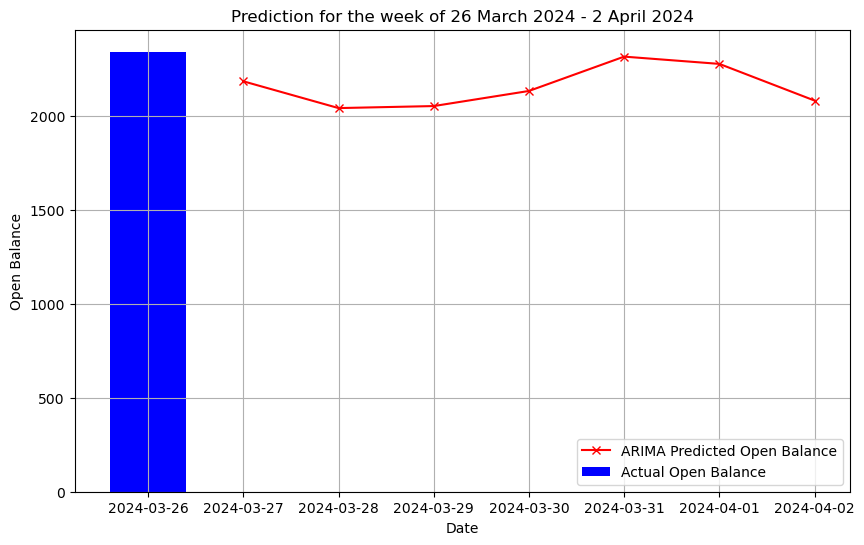

In [20]:
# Sample data for filtered_values
filtered_values = df_2022_2024_testing['Open Balances'][-1:]

# Calculate the start and end dates for predictions
pred_start_date = pd.Timestamp('2024-03-27')
pred_end_date = pred_start_date + pd.Timedelta(days=6)
time_index_2024 = pd.date_range(start=pred_start_date, end=pred_end_date, freq='D')

# Plotting
plt.figure(figsize=(10, 6))

# Plot filtered_values as a bar plot
plt.bar(df_2022_2024_testing.index[-1:], filtered_values, label='Actual Open Balance', color='blue')

# Plot predicted values for 2024 as a line plot
plt.plot(time_index_2024, predictions_2024, marker='x', label='ARIMA Predicted Open Balance', color='red')

plt.title('Prediction for the week of 26 March 2024 - 2 April 2024')
plt.xlabel('Date')
plt.ylabel('Open Balance')
plt.legend()
plt.grid(True)
plt.show()


# Archived Models

## SARIMA Model (Not going to be used)

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [16]:
# Initialize history with training data
history = [x for x in train_arima]
y = test_arima
predictions = list()
residuals = list()

# SARIMA seasonal differencing parameters
seasonal_order = (0, 1, 1, 4)  # (P, D, Q, s=4 because quarterly)

# Iterate over test data to make predictions
for i in range(0, len(y)):
    # Fit SARIMA model with seasonal differencing
    model = SARIMAX(history, order=(7, 1, 1), seasonal_order=seasonal_order)
    model_fit = model.fit()
    
    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions.append(yhat)
    
    # Get the observation from test data
    obs = y[i]
    
    # Calculate residual
    residual = obs - yhat
    residuals.append(residual)
    
    # Update the history with the observation
    history.append(obs)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46645D+00    |proj g|=  1.49165D-01

At iterate    5    f=  6.40421D+00    |proj g|=  5.59096D-02

At iterate   10    f=  6.38245D+00    |proj g|=  2.57693D-02

At iterate   15    f=  6.37296D+00    |proj g|=  1.00047D-02

At iterate   20    f=  6.37189D+00    |proj g|=  1.79451D-03

At iterate   25    f=  6.36869D+00    |proj g|=  4.64171D-02

At iterate   30    f=  6.34185D+00    |proj g|=  8.95408D-03

At iterate   35    f=  6.34164D+00    |proj g|=  4.31848D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   10    f=  6.38515D+00    |proj g|=  2.69104D-02

At iterate   15    f=  6.37350D+00    |proj g|=  9.66472D-03

At iterate   20    f=  6.37130D+00    |proj g|=  2.44733D-03

At iterate   25    f=  6.37019D+00    |proj g|=  1.71280D-02

At iterate   30    f=  6.35193D+00    |proj g|=  9.65242D-02

At iterate   35    f=  6.34315D+00    |proj g|=  6.77049D-02

At iterate   40    f=  6.34109D+00    |proj g|=  5.72176D-03

At iterate   45    f=  6.34105D+00    |proj g|=  2.39400D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     45     50      1     0     0   2.394D-05   6.341D+00
  F =   6.34105359933

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46567D+00    |proj g|=  1.50413D-01

At iterate    5    f=  6.40335D+00    |proj g|=  9.54106D-02

At iterate   10    f=  6.38590D+00    |proj g|=  3.83120D-02

At iterate   15    f=  6.37327D+00    |proj g|=  1.01045D-02

At iterate   20    f=  6.37102D+00    |proj g|=  1.79629D-03

At iterate   25    f=  6.37029D+00    |proj g|=  1.18604D-02

At iterate   30    f=  6.35807D+00    |proj g|=  2.09826D-02

At iterate   35    f=  6.35371D+00    |proj g|=  5.33916D-02

At iterate   40    f=  6.34257D+00    |proj g|=  4.21957D-02

At iterate   45    f=  6.34093D+00    |proj g|=  6.34346D-03

At iterate   50    f=  6.34091D+00    |proj g|=  1.04183D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46563D+00    |proj g|=  1.51461D-01


 This problem is unconstrained.



At iterate    5    f=  6.40328D+00    |proj g|=  3.57928D-02

At iterate   10    f=  6.38184D+00    |proj g|=  2.18374D-02

At iterate   15    f=  6.37214D+00    |proj g|=  1.44301D-02

At iterate   20    f=  6.37072D+00    |proj g|=  3.01330D-03

At iterate   25    f=  6.36832D+00    |proj g|=  2.59581D-02

At iterate   30    f=  6.34232D+00    |proj g|=  3.10084D-02

At iterate   35    f=  6.34094D+00    |proj g|=  2.55785D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     37     39      1     0     0   5.123D-05   6.341D+00
  F =   6.3409388861248042     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46518D+00    |proj g|=  1.51355D-01

At iterate    5    f=  6.40289D+00    |proj g|=  3.56582D-02

At iterate   10    f=  6.38171D+00    |proj g|=  2.20403D-02

At iterate   15    f=  6.37217D+00    |proj g|=  3.05748D-02

At iterate   20    f=  6.37064D+00    |proj g|=  6.54446D-03

At iterate   25    f=  6.37033D+00    |proj g|=  9.22962D-03

At iterate   30    f=  6.36655D+00    |proj g|=  3.26516D-02

At iterate   35    f=  6.35870D+00    |proj g|=  2.43197D-02

At iterate   40    f=  6.34585D+00    |proj g|=  6.81131D-02

At iterate   45    f=  6.34102D+00    |proj g|=  2.78047D-03


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.34100D+00    |proj g|=  1.15764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57      1     0     0   1.158D-04   6.341D+00
  F =   6.3410043374229295     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46459D+00    |proj g|=  1.51123D-01


 This problem is unconstrained.



At iterate    5    f=  6.40225D+00    |proj g|=  3.53504D-02

At iterate   10    f=  6.37946D+00    |proj g|=  2.25140D-02

At iterate   15    f=  6.37177D+00    |proj g|=  1.01333D-02

At iterate   20    f=  6.37010D+00    |proj g|=  1.78881D-03

At iterate   25    f=  6.36709D+00    |proj g|=  4.23760D-02

At iterate   30    f=  6.34939D+00    |proj g|=  4.64181D-02

At iterate   35    f=  6.34114D+00    |proj g|=  2.41417D-02

At iterate   40    f=  6.34038D+00    |proj g|=  7.08407D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     44     51      1     0     0   4.674D-05   6.340D+00
  F =   6.34038298233

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47157D+00    |proj g|=  1.48801D-01

At iterate    5    f=  6.41153D+00    |proj g|=  3.78412D-02

At iterate   10    f=  6.38737D+00    |proj g|=  1.83758D-02

At iterate   15    f=  6.37786D+00    |proj g|=  8.34577D-03

At iterate   20    f=  6.37676D+00    |proj g|=  2.87220D-03

At iterate   25    f=  6.37460D+00    |proj g|=  2.27812D-02

At iterate   30    f=  6.35438D+00    |proj g|=  3.75835D-02

At iterate   35    f=  6.34717D+00    |proj g|=  1.07990D-02

At iterate   40    f=  6.34710D+00    |proj g|=  7.34144D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  6.41056D+00    |proj g|=  3.40776D-02

At iterate   10    f=  6.38877D+00    |proj g|=  2.35937D-02

At iterate   15    f=  6.37971D+00    |proj g|=  1.34576D-02

At iterate   20    f=  6.37774D+00    |proj g|=  2.01912D-03

At iterate   25    f=  6.37649D+00    |proj g|=  2.05561D-02

At iterate   30    f=  6.36258D+00    |proj g|=  2.68043D-02

At iterate   35    f=  6.34933D+00    |proj g|=  2.91437D-02

At iterate   40    f=  6.34708D+00    |proj g|=  9.26380D-03

At iterate   45    f=  6.34702D+00    |proj g|=  9.37313D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     58   

 This problem is unconstrained.



At iterate    5    f=  6.41329D+00    |proj g|=  3.90645D-02

At iterate   10    f=  6.38876D+00    |proj g|=  2.44759D-02

At iterate   15    f=  6.37891D+00    |proj g|=  9.70178D-03

At iterate   20    f=  6.37768D+00    |proj g|=  3.74546D-03

At iterate   25    f=  6.37645D+00    |proj g|=  2.03762D-02

At iterate   30    f=  6.35788D+00    |proj g|=  2.79627D-02

At iterate   35    f=  6.34704D+00    |proj g|=  8.75650D-03

At iterate   40    f=  6.34697D+00    |proj g|=  1.42773D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42     46      1     0     0   3.845D-06   6.347D+00
  F =   6.34696544589

 This problem is unconstrained.



At iterate    5    f=  6.41407D+00    |proj g|=  3.89137D-02

At iterate   10    f=  6.38942D+00    |proj g|=  2.44392D-02

At iterate   15    f=  6.38007D+00    |proj g|=  9.05744D-03

At iterate   20    f=  6.37905D+00    |proj g|=  3.37287D-03

At iterate   25    f=  6.37621D+00    |proj g|=  2.14736D-02

At iterate   30    f=  6.35375D+00    |proj g|=  2.39686D-02

At iterate   35    f=  6.34865D+00    |proj g|=  1.23819D-02

At iterate   40    f=  6.34858D+00    |proj g|=  9.51759D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     41     44      1     0     0   4.838D-05   6.349D+00
  F =   6.34857631379

 This problem is unconstrained.



At iterate    5    f=  6.41198D+00    |proj g|=  4.36710D-02

At iterate   10    f=  6.39300D+00    |proj g|=  1.32795D-02

At iterate   15    f=  6.38139D+00    |proj g|=  8.59470D-03

At iterate   20    f=  6.37888D+00    |proj g|=  5.72352D-03

At iterate   25    f=  6.37760D+00    |proj g|=  2.12791D-02

At iterate   30    f=  6.35896D+00    |proj g|=  9.41476D-02

At iterate   35    f=  6.35100D+00    |proj g|=  8.91020D-02

At iterate   40    f=  6.34807D+00    |proj g|=  7.32524D-03

At iterate   45    f=  6.34803D+00    |proj g|=  4.04949D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     56   

 This problem is unconstrained.



At iterate    5    f=  6.41206D+00    |proj g|=  3.56994D-02

At iterate   10    f=  6.38852D+00    |proj g|=  2.39709D-02

At iterate   15    f=  6.37961D+00    |proj g|=  1.13681D-02

At iterate   20    f=  6.37875D+00    |proj g|=  3.38612D-03

At iterate   25    f=  6.37407D+00    |proj g|=  2.83036D-02

At iterate   30    f=  6.36256D+00    |proj g|=  3.51763D-02

At iterate   35    f=  6.35125D+00    |proj g|=  3.06149D-02

At iterate   40    f=  6.34768D+00    |proj g|=  3.16101D-03

At iterate   45    f=  6.34766D+00    |proj g|=  5.19960D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     54   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47430D+00    |proj g|=  1.46196D-01

At iterate    5    f=  6.41104D+00    |proj g|=  3.55084D-02

At iterate   10    f=  6.39011D+00    |proj g|=  2.36390D-02

At iterate   15    f=  6.37981D+00    |proj g|=  1.51600D-02

At iterate   20    f=  6.37813D+00    |proj g|=  2.76704D-03

At iterate   25    f=  6.37671D+00    |proj g|=  1.44872D-02

At iterate   30    f=  6.36001D+00    |proj g|=  2.17114D-02

At iterate   35    f=  6.35094D+00    |proj g|=  6.79573D-02

At iterate   40    f=  6.34710D+00    |proj g|=  7.16129D-03

At iterate   45    f=  6.34703D+00    |proj g|=  5.05796D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  6.40996D+00    |proj g|=  3.46054D-02

At iterate   10    f=  6.38648D+00    |proj g|=  2.29307D-02

At iterate   15    f=  6.37948D+00    |proj g|=  7.66458D-03

At iterate   20    f=  6.37779D+00    |proj g|=  2.48824D-03

At iterate   25    f=  6.37736D+00    |proj g|=  1.48483D-02

At iterate   30    f=  6.36451D+00    |proj g|=  4.75521D-02

At iterate   35    f=  6.35138D+00    |proj g|=  4.69946D-02

At iterate   40    f=  6.34677D+00    |proj g|=  3.18387D-03

At iterate   45    f=  6.34675D+00    |proj g|=  1.05872D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     55   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47302D+00    |proj g|=  1.46904D-01

At iterate    5    f=  6.40932D+00    |proj g|=  3.38137D-02

At iterate   10    f=  6.39067D+00    |proj g|=  2.05710D-02

At iterate   15    f=  6.37967D+00    |proj g|=  6.47346D-03

At iterate   20    f=  6.37760D+00    |proj g|=  2.40582D-03

At iterate   25    f=  6.36808D+00    |proj g|=  9.08632D-02

At iterate   30    f=  6.34625D+00    |proj g|=  5.64511D-03

At iterate   35    f=  6.34615D+00    |proj g|=  3.45731D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  6.40873D+00    |proj g|=  3.37375D-02

At iterate   10    f=  6.38533D+00    |proj g|=  2.48147D-02

At iterate   15    f=  6.37874D+00    |proj g|=  9.84684D-03

At iterate   20    f=  6.37692D+00    |proj g|=  1.81606D-03

At iterate   25    f=  6.37630D+00    |proj g|=  2.05287D-02

At iterate   30    f=  6.35017D+00    |proj g|=  5.65290D-02

At iterate   35    f=  6.34557D+00    |proj g|=  2.61684D-03

At iterate   40    f=  6.34557D+00    |proj g|=  1.01104D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     40     45      1     0     0   1.011D-05   6.346D+00
  F =   6.34556787845

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47194D+00    |proj g|=  1.46666D-01

At iterate    5    f=  6.40852D+00    |proj g|=  3.47463D-02

At iterate   10    f=  6.38783D+00    |proj g|=  2.35529D-02

At iterate   15    f=  6.37830D+00    |proj g|=  1.54949D-02

At iterate   20    f=  6.37644D+00    |proj g|=  1.81573D-03

At iterate   25    f=  6.37582D+00    |proj g|=  8.77610D-03

At iterate   30    f=  6.36555D+00    |proj g|=  3.12924D-02

At iterate   35    f=  6.35144D+00    |proj g|=  3.60797D-02

At iterate   40    f=  6.34523D+00    |proj g|=  1.57197D-02

At iterate   45    f=  6.34511D+00    |proj g|=  2.05710D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   10    f=  6.38800D+00    |proj g|=  2.44580D-02

At iterate   15    f=  6.37764D+00    |proj g|=  1.50459D-02

At iterate   20    f=  6.37596D+00    |proj g|=  1.72481D-02

At iterate   25    f=  6.37511D+00    |proj g|=  2.88047D-02

At iterate   30    f=  6.35862D+00    |proj g|=  7.22291D-02

At iterate   35    f=  6.34768D+00    |proj g|=  4.64108D-02

At iterate   40    f=  6.34452D+00    |proj g|=  1.87997D-03

At iterate   45    f=  6.34451D+00    |proj g|=  2.04542D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     52      1     0     0   5.681D-05   6.345D+00
  F =   6.34450725568

 This problem is unconstrained.



At iterate    5    f=  6.40850D+00    |proj g|=  3.60962D-02

At iterate   10    f=  6.38721D+00    |proj g|=  2.55501D-02

At iterate   15    f=  6.37722D+00    |proj g|=  1.72990D-02

At iterate   20    f=  6.37557D+00    |proj g|=  9.35823D-03

At iterate   25    f=  6.37471D+00    |proj g|=  1.69853D-02

At iterate   30    f=  6.35116D+00    |proj g|=  8.51676D-02

At iterate   35    f=  6.34445D+00    |proj g|=  3.81184D-02

At iterate   40    f=  6.34403D+00    |proj g|=  1.83770D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42     49      1     0     0   7.598D-06   6.344D+00
  F =   6.34402570122

 This problem is unconstrained.



At iterate    5    f=  6.40770D+00    |proj g|=  3.59575D-02

At iterate   10    f=  6.38550D+00    |proj g|=  2.37645D-02

At iterate   15    f=  6.37683D+00    |proj g|=  1.19324D-02

At iterate   20    f=  6.37472D+00    |proj g|=  1.81823D-03

At iterate   25    f=  6.37377D+00    |proj g|=  2.43928D-02

At iterate   30    f=  6.36559D+00    |proj g|=  4.71811D-02

At iterate   35    f=  6.35986D+00    |proj g|=  5.34580D-02

At iterate   40    f=  6.34813D+00    |proj g|=  5.39021D-02

At iterate   45    f=  6.34357D+00    |proj g|=  2.58541D-02


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  6.34340D+00    |proj g|=  1.31924D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58      1     0     0   1.319D-04   6.343D+00
  F =   6.3434003017620944     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47109D+00    |proj g|=  1.47485D-01

At iterate    5    f=  6.40724D+00    |proj g|=  3.48608D-02

At iterate   10    f=  6.38540D+00    |proj g|=  2.64693D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47038D+00    |proj g|=  1.47327D-01

At iterate    5    f=  6.40664D+00    |proj g|=  3.46472D-02

At iterate   10    f=  6.38703D+00    |proj g|=  2.44672D-02

At iterate   15    f=  6.37704D+00    |proj g|=  1.10993D-02

At iterate   20    f=  6.37437D+00    |proj g|=  3.21424D-03

At iterate   25    f=  6.37346D+00    |proj g|=  1.07801D-02

At iterate   30    f=  6.36189D+00    |proj g|=  5.11235D-02

At iterate   35    f=  6.35338D+00    |proj g|=  4.48787D-02

At iterate   40    f=  6.34384D+00    |proj g|=  2.99482D-02

At iterate   45    f=  6.34314D+00    |proj g|=  9.02578D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  6.40669D+00    |proj g|=  3.40090D-02

At iterate   10    f=  6.38366D+00    |proj g|=  2.65665D-02

At iterate   15    f=  6.37632D+00    |proj g|=  8.82890D-03

At iterate   20    f=  6.37423D+00    |proj g|=  1.92985D-03

At iterate   25    f=  6.36873D+00    |proj g|=  3.98137D-02

At iterate   30    f=  6.34818D+00    |proj g|=  2.77652D-02

At iterate   35    f=  6.34323D+00    |proj g|=  8.95340D-03

At iterate   40    f=  6.34304D+00    |proj g|=  4.78458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     44     54      1     0     0   5.676D-06   6.343D+00
  F =   6.34304352781

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46999D+00    |proj g|=  1.47911D-01

At iterate    5    f=  6.40605D+00    |proj g|=  3.40149D-02

At iterate   10    f=  6.38384D+00    |proj g|=  2.94741D-02

At iterate   15    f=  6.37591D+00    |proj g|=  1.43344D-02

At iterate   20    f=  6.37365D+00    |proj g|=  4.80193D-03

At iterate   25    f=  6.37307D+00    |proj g|=  8.99119D-03

At iterate   30    f=  6.36169D+00    |proj g|=  6.56818D-02

At iterate   35    f=  6.35294D+00    |proj g|=  5.38192D-02

At iterate   40    f=  6.34346D+00    |proj g|=  2.31060D-02

At iterate   45    f=  6.34245D+00    |proj g|=  7.34417D-04


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.34245D+00    |proj g|=  2.51599D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58      1     0     0   2.516D-05   6.342D+00
  F =   6.3424483677888892     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46949D+00    |proj g|=  1.47984D-01

At iterate    5    f=  6.40525D+00    |proj g|=  3.45316D-02

At iterate   10    f=  6.38317D+00    |proj g|=  2.46977D-02

At iterate   15    f=  6.37478D+00    |proj g|=  8.62720D-03

At iterate   20    f=  6.37308D+00    |proj g|=  7.34732D-03

At iterate   25    f=  6.37145D+00    |proj g|=  3.03862D-02

At iterate   30    f=  6.35663D+00    |proj g|=  4.80691D-02

At iterate   35    f=  6.34263D+00    |proj g|=  2.69693D-02

At iterate   40    f=  6.34183D+00    |proj g|=  2.08385D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  6.40582D+00    |proj g|=  3.52470D-02

At iterate   10    f=  6.38135D+00    |proj g|=  2.62524D-02

At iterate   15    f=  6.37398D+00    |proj g|=  8.33701D-03

At iterate   20    f=  6.37295D+00    |proj g|=  1.82468D-03

At iterate   25    f=  6.37212D+00    |proj g|=  2.67614D-02

At iterate   30    f=  6.35712D+00    |proj g|=  6.15752D-02

At iterate   35    f=  6.34809D+00    |proj g|=  6.91501D-02

At iterate   40    f=  6.34166D+00    |proj g|=  1.71087D-02

At iterate   45    f=  6.34157D+00    |proj g|=  2.91207D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     56   

 This problem is unconstrained.



At iterate    5    f=  6.40603D+00    |proj g|=  3.65147D-02

At iterate   10    f=  6.38446D+00    |proj g|=  2.57537D-02

At iterate   15    f=  6.37415D+00    |proj g|=  1.50996D-02

At iterate   20    f=  6.37251D+00    |proj g|=  8.18531D-03

At iterate   25    f=  6.37169D+00    |proj g|=  1.10602D-02

At iterate   30    f=  6.35648D+00    |proj g|=  4.63800D-02

At iterate   35    f=  6.34546D+00    |proj g|=  1.01281D-01

At iterate   40    f=  6.34103D+00    |proj g|=  5.69441D-03

At iterate   45    f=  6.34099D+00    |proj g|=  1.82640D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     55   

 This problem is unconstrained.



At iterate    5    f=  6.40519D+00    |proj g|=  3.59843D-02

At iterate   10    f=  6.38321D+00    |proj g|=  2.48348D-02

At iterate   15    f=  6.37386D+00    |proj g|=  1.18292D-02

At iterate   20    f=  6.37199D+00    |proj g|=  3.21720D-03

At iterate   25    f=  6.37146D+00    |proj g|=  8.25531D-03

At iterate   30    f=  6.36113D+00    |proj g|=  1.28111D-01

At iterate   35    f=  6.34101D+00    |proj g|=  1.63708D-02

At iterate   40    f=  6.34050D+00    |proj g|=  2.03142D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42     47      1     0     0   6.711D-05   6.340D+00
  F =   6.34049764141

 This problem is unconstrained.



At iterate    5    f=  6.40442D+00    |proj g|=  3.55309D-02

At iterate   10    f=  6.38249D+00    |proj g|=  2.53664D-02

At iterate   15    f=  6.37354D+00    |proj g|=  1.35897D-02

At iterate   20    f=  6.37159D+00    |proj g|=  6.98869D-03

At iterate   25    f=  6.37138D+00    |proj g|=  4.73170D-03

At iterate   30    f=  6.36445D+00    |proj g|=  1.05411D-01

At iterate   35    f=  6.34415D+00    |proj g|=  3.78090D-02

At iterate   40    f=  6.34002D+00    |proj g|=  3.18110D-03

At iterate   45    f=  6.33999D+00    |proj g|=  8.71411D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     46     51   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46830D+00    |proj g|=  1.48323D-01

At iterate    5    f=  6.40368D+00    |proj g|=  3.48659D-02

At iterate   10    f=  6.38029D+00    |proj g|=  2.27167D-02

At iterate   15    f=  6.37268D+00    |proj g|=  6.66667D-03

At iterate   20    f=  6.37127D+00    |proj g|=  1.82878D-03

At iterate   25    f=  6.36827D+00    |proj g|=  3.53617D-02

At iterate   30    f=  6.35796D+00    |proj g|=  1.01051D-01

At iterate   35    f=  6.35320D+00    |proj g|=  4.56937D-02

At iterate   40    f=  6.34049D+00    |proj g|=  1.78283D-02

At iterate   45    f=  6.33973D+00    |proj g|=  1.41369D-03


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.33973D+00    |proj g|=  9.33509D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59      1     0     0   9.335D-05   6.340D+00
  F =   6.3397258437750876     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46799D+00    |proj g|=  1.47456D-01

At iterate    5    f=  6.40396D+00    |proj g|=  3.56493D-02

At iterate   10    f=  6.38260D+00    |proj g|=  2.30103D-02

At iterate   15    f=  6.37275D+00    |proj g|=  1.42043D-02

At iterate   20    f=  6.37116D+00    |proj g|=  2.42165D-03

At iterate   25    f=  6.37042D+00    |proj g|=  2.55519D-02

At iterate   30    f=  6.35609D+00    |proj g|=  3.17350D-02

At iterate   35    f=  6.34635D+00    |proj g|=  5.76789D-02

At iterate   40    f=  6.33963D+00    |proj g|=  5.14204D-03

At iterate   45    f=  6.33954D+00    |proj g|=  5.52548D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Ca

 This problem is unconstrained.



At iterate    5    f=  6.40397D+00    |proj g|=  3.60514D-02

At iterate   10    f=  6.38248D+00    |proj g|=  2.23974D-02

At iterate   15    f=  6.37254D+00    |proj g|=  1.30150D-02

At iterate   20    f=  6.37080D+00    |proj g|=  1.44942D-02

At iterate   25    f=  6.36961D+00    |proj g|=  3.48646D-02

At iterate   30    f=  6.35136D+00    |proj g|=  9.99688D-02

At iterate   35    f=  6.33907D+00    |proj g|=  1.46514D-02

At iterate   40    f=  6.33893D+00    |proj g|=  1.38696D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     41     45      1     0     0   1.775D-05   6.339D+00
  F =   6.33892571964

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46724D+00    |proj g|=  1.47722D-01

At iterate    5    f=  6.40361D+00    |proj g|=  3.65148D-02

At iterate   10    f=  6.38202D+00    |proj g|=  2.49200D-02

At iterate   15    f=  6.37196D+00    |proj g|=  1.32636D-02

At iterate   20    f=  6.37008D+00    |proj g|=  2.40443D-03

At iterate   25    f=  6.36918D+00    |proj g|=  2.69813D-02

At iterate   30    f=  6.34216D+00    |proj g|=  8.25254D-02

At iterate   35    f=  6.33832D+00    |proj g|=  3.99264D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46642D+00    |proj g|=  1.47639D-01

At iterate    5    f=  6.40298D+00    |proj g|=  3.64248D-02

At iterate   10    f=  6.38132D+00    |proj g|=  2.39498D-02

At iterate   15    f=  6.37139D+00    |proj g|=  1.37003D-02

At iterate   20    f=  6.36959D+00    |proj g|=  8.48001D-03

At iterate   25    f=  6.36874D+00    |proj g|=  3.06417D-02

At iterate   30    f=  6.34926D+00    |proj g|=  4.80742D-02

At iterate   35    f=  6.33914D+00    |proj g|=  3.20789D-02

At iterate   40    f=  6.33782D+00    |proj g|=  2.21045D-03

At iterate   45    f=  6.33781D+00    |proj g|=  1.27614D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  6.40205D+00    |proj g|=  3.62375D-02

At iterate   10    f=  6.37983D+00    |proj g|=  2.32272D-02

At iterate   15    f=  6.37048D+00    |proj g|=  1.13525D-02

At iterate   20    f=  6.36888D+00    |proj g|=  1.83768D-03

At iterate   25    f=  6.36795D+00    |proj g|=  1.50250D-02

At iterate   30    f=  6.35763D+00    |proj g|=  3.47084D-02

At iterate   35    f=  6.35261D+00    |proj g|=  4.00579D-02

At iterate   40    f=  6.34165D+00    |proj g|=  9.67394D-02

At iterate   45    f=  6.33727D+00    |proj g|=  2.86160D-03


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.33724D+00    |proj g|=  1.92023D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     62      1     0     0   1.920D-04   6.337D+00
  F =   6.3372414865144080     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46525D+00    |proj g|=  1.48226D-01

At iterate    5    f=  6.40147D+00    |proj g|=  3.60488D-02

At iterate   10    f=  6.37965D+00    |proj g|=  2.41990D-02

At iterate   15    f=  6.36992D+00    |proj g|=  9.17121D-03

At iterate   20    f=  6.36842D+00    |proj g|=  1.83803D-03

At iterate   25    f=  6.36703D+00    |proj g|=  1.55433D-02

At iterate   30    f=  6.35358D+00    |proj g|=  2.93030D-02

At iterate   35    f=  6.34629D+00    |proj g|=  4.17698D-02

At iterate   40    f=  6.33738D+00    |proj g|=  3.00786D-02

At iterate   45    f=  6.33681D+00    |proj g|=  1.33295D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Ca

 This problem is unconstrained.



At iterate    5    f=  6.40094D+00    |proj g|=  3.60305D-02

At iterate   10    f=  6.37905D+00    |proj g|=  2.37481D-02

At iterate   15    f=  6.36942D+00    |proj g|=  1.01567D-02

At iterate   20    f=  6.36789D+00    |proj g|=  1.83869D-03

At iterate   25    f=  6.36720D+00    |proj g|=  1.70665D-02

At iterate   30    f=  6.35669D+00    |proj g|=  6.31776D-02

At iterate   35    f=  6.35035D+00    |proj g|=  3.70836D-02

At iterate   40    f=  6.34115D+00    |proj g|=  5.70444D-02

At iterate   45    f=  6.33630D+00    |proj g|=  2.02049D-03


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.33629D+00    |proj g|=  2.30143D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59      1     0     0   2.301D-05   6.336D+00
  F =   6.3362918928099301     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46430D+00    |proj g|=  1.47978D-01


 This problem is unconstrained.



At iterate    5    f=  6.40088D+00    |proj g|=  3.62607D-02

At iterate   10    f=  6.37916D+00    |proj g|=  2.10192D-02

At iterate   15    f=  6.37016D+00    |proj g|=  1.16595D-02

At iterate   20    f=  6.36802D+00    |proj g|=  2.35142D-02

At iterate   25    f=  6.36769D+00    |proj g|=  3.35467D-03

At iterate   30    f=  6.35644D+00    |proj g|=  5.27978D-02

At iterate   35    f=  6.33695D+00    |proj g|=  3.06704D-02

At iterate   40    f=  6.33633D+00    |proj g|=  1.57417D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     44     48      1     0     0   3.278D-05   6.336D+00
  F =   6.33632517521

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46389D+00    |proj g|=  1.48046D-01

At iterate    5    f=  6.40062D+00    |proj g|=  3.62245D-02

At iterate   10    f=  6.37866D+00    |proj g|=  2.06814D-02

At iterate   15    f=  6.36891D+00    |proj g|=  1.08222D-02

At iterate   20    f=  6.36748D+00    |proj g|=  2.43538D-02

At iterate   25    f=  6.36243D+00    |proj g|=  8.79871D-02

At iterate   30    f=  6.34697D+00    |proj g|=  6.36602D-02

At iterate   35    f=  6.33591D+00    |proj g|=  9.79635D-03

At iterate   40    f=  6.33586D+00    |proj g|=  5.26243D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  6.40014D+00    |proj g|=  3.63529D-02

At iterate   10    f=  6.37785D+00    |proj g|=  2.00353D-02

At iterate   15    f=  6.36824D+00    |proj g|=  9.77674D-03

At iterate   20    f=  6.36684D+00    |proj g|=  8.23592D-03

At iterate   25    f=  6.35206D+00    |proj g|=  4.35570D-02

At iterate   30    f=  6.33982D+00    |proj g|=  2.91912D-02

At iterate   35    f=  6.33542D+00    |proj g|=  1.05425D-02

At iterate   40    f=  6.33524D+00    |proj g|=  6.77598D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     43     50      1     0     0   2.552D-05   6.335D+00
  F =   6.33524348919

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46274D+00    |proj g|=  1.47924D-01

At iterate    5    f=  6.39948D+00    |proj g|=  3.63071D-02

At iterate   10    f=  6.37745D+00    |proj g|=  2.08523D-02

At iterate   15    f=  6.36771D+00    |proj g|=  1.10428D-02

At iterate   20    f=  6.36618D+00    |proj g|=  1.09221D-02

At iterate   25    f=  6.35696D+00    |proj g|=  3.51215D-02

At iterate   30    f=  6.33646D+00    |proj g|=  2.06247D-02

At iterate   35    f=  6.33463D+00    |proj g|=  9.03506D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46268D+00    |proj g|=  1.47533D-01

At iterate    5    f=  6.39977D+00    |proj g|=  3.59839D-02

At iterate   10    f=  6.37762D+00    |proj g|=  1.98398D-02

At iterate   15    f=  6.36786D+00    |proj g|=  1.03473D-02

At iterate   20    f=  6.36638D+00    |proj g|=  1.08371D-02

At iterate   25    f=  6.36033D+00    |proj g|=  3.42060D-02

At iterate   30    f=  6.34889D+00    |proj g|=  3.08748D-02

At iterate   35    f=  6.33868D+00    |proj g|=  4.59656D-02

At iterate   40    f=  6.33457D+00    |proj g|=  3.35591D-03

At iterate   45    f=  6.33455D+00    |proj g|=  1.65532D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  6.40034D+00    |proj g|=  3.59920D-02

At iterate   10    f=  6.37820D+00    |proj g|=  2.31467D-02

At iterate   15    f=  6.36847D+00    |proj g|=  1.35021D-02

At iterate   20    f=  6.36707D+00    |proj g|=  7.39555D-03

At iterate   25    f=  6.36672D+00    |proj g|=  1.37572D-02

At iterate   30    f=  6.35525D+00    |proj g|=  4.94219D-02

At iterate   35    f=  6.33703D+00    |proj g|=  1.93036D-02

At iterate   40    f=  6.33588D+00    |proj g|=  1.15905D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     44     53      1     0     0   1.751D-06   6.336D+00
  F =   6.33588119306

 This problem is unconstrained.



At iterate    5    f=  6.40011D+00    |proj g|=  3.53078D-02

At iterate   10    f=  6.37866D+00    |proj g|=  2.50059D-02

At iterate   15    f=  6.36948D+00    |proj g|=  1.09456D-02

At iterate   20    f=  6.36740D+00    |proj g|=  3.18595D-03

At iterate   25    f=  6.36589D+00    |proj g|=  2.59050D-02

At iterate   30    f=  6.35360D+00    |proj g|=  3.29824D-02

At iterate   35    f=  6.34142D+00    |proj g|=  3.88637D-02

At iterate   40    f=  6.33625D+00    |proj g|=  9.28045D-03

At iterate   45    f=  6.33614D+00    |proj g|=  1.66207D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     66      1     0     0   1.035D-05   6.336D+00
  F =   6.3361430937387562     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46336D+00    |proj g|=  1.47715D-01

At iterate    5    f=  6.39996D+00    |proj g|=  3.51035D-02

At iterate   10    f=  6.37852D+00    |proj g|=  2.54554D-02

At iterate   15    f=  6.36949D+00    |proj g|=  1.24630D-02

At iter

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  6.33615D+00    |proj g|=  1.90145D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58      1     0     0   1.901D-03   6.336D+00
  F =   6.3361504710701295     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46385D+00    |proj g|=  1.49040D-01

At iterate    5    f=  6.40021D+00    |proj g|=  3.46700D-02

At iterate   10    f=  6.38158D+00    |proj g|=  1.36067D-02

At iter

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46550D+00    |proj g|=  1.46847D-01

At iterate    5    f=  6.40373D+00    |proj g|=  3.83661D-02

At iterate   10    f=  6.37919D+00    |proj g|=  2.34729D-02

At iterate   15    f=  6.37032D+00    |proj g|=  1.21869D-02

At iterate   20    f=  6.36892D+00    |proj g|=  1.83524D-03

At iterate   25    f=  6.36743D+00    |proj g|=  3.04628D-02

At iterate   30    f=  6.35451D+00    |proj g|=  2.60470D-02

At iterate   35    f=  6.34220D+00    |proj g|=  7.34851D-02

At iterate   40    f=  6.33798D+00    |proj g|=  1.75962D-02

At iterate   45    f=  6.33744D+00    |proj g|=  1.01647D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Ca

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46574D+00    |proj g|=  1.46928D-01

At iterate    5    f=  6.40244D+00    |proj g|=  3.66369D-02

At iterate   10    f=  6.37990D+00    |proj g|=  2.34503D-02

At iterate   15    f=  6.37096D+00    |proj g|=  1.20104D-02

At iterate   20    f=  6.36867D+00    |proj g|=  5.19556D-03

At iterate   25    f=  6.36842D+00    |proj g|=  8.91605D-03

At iterate   30    f=  6.35200D+00    |proj g|=  9.15526D-02

At iterate   35    f=  6.33854D+00    |proj g|=  1.63854D-02

At iterate   40    f=  6.33726D+00    |proj g|=  3.47209D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  6.40328D+00    |proj g|=  3.79602D-02

At iterate   10    f=  6.38089D+00    |proj g|=  2.33259D-02

At iterate   15    f=  6.37034D+00    |proj g|=  8.00700D-03

At iterate   20    f=  6.36841D+00    |proj g|=  2.94202D-03

At iterate   25    f=  6.36789D+00    |proj g|=  1.50695D-02

At iterate   30    f=  6.35680D+00    |proj g|=  4.07138D-02

At iterate   35    f=  6.34042D+00    |proj g|=  4.03128D-02

At iterate   40    f=  6.33724D+00    |proj g|=  1.06876D-02

At iterate   45    f=  6.33711D+00    |proj g|=  1.74289D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     52   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46508D+00    |proj g|=  1.46628D-01

At iterate    5    f=  6.40466D+00    |proj g|=  4.10496D-02

At iterate   10    f=  6.38492D+00    |proj g|=  3.46469D-02

At iterate   15    f=  6.37100D+00    |proj g|=  2.19120D-02

At iterate   20    f=  6.36835D+00    |proj g|=  5.95093D-03

At iterate   25    f=  6.36788D+00    |proj g|=  4.62194D-03

At iterate   30    f=  6.36243D+00    |proj g|=  6.93615D-02

At iterate   35    f=  6.34660D+00    |proj g|=  3.15428D-02

At iterate   40    f=  6.33767D+00    |proj g|=  1.27486D-02

At iterate   45    f=  6.33693D+00    |proj g|=  1.95517D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   10    f=  6.38504D+00    |proj g|=  3.42618D-02

At iterate   15    f=  6.37084D+00    |proj g|=  1.62812D-02

At iterate   20    f=  6.36836D+00    |proj g|=  5.55971D-03

At iterate   25    f=  6.36793D+00    |proj g|=  7.03512D-03

At iterate   30    f=  6.36225D+00    |proj g|=  5.23908D-02

At iterate   35    f=  6.35125D+00    |proj g|=  3.49013D-02

At iterate   40    f=  6.33834D+00    |proj g|=  5.69263D-02

At iterate   45    f=  6.33707D+00    |proj g|=  3.20750D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     53      1     0     0   6.547D-05   6.337D+00
  F =   6.33705080662

 This problem is unconstrained.



At iterate    5    f=  6.40469D+00    |proj g|=  4.04765D-02

At iterate   10    f=  6.38495D+00    |proj g|=  3.42950D-02

At iterate   15    f=  6.37076D+00    |proj g|=  2.45812D-02

At iterate   20    f=  6.36819D+00    |proj g|=  3.19973D-03

At iterate   25    f=  6.36788D+00    |proj g|=  5.87676D-03

At iterate   30    f=  6.36182D+00    |proj g|=  3.11395D-02

At iterate   35    f=  6.34457D+00    |proj g|=  4.29820D-02

At iterate   40    f=  6.33702D+00    |proj g|=  1.43703D-02

At iterate   45    f=  6.33674D+00    |proj g|=  7.33250D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     55   

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46436D+00    |proj g|=  1.48274D-01

At iterate    5    f=  6.40369D+00    |proj g|=  4.19000D-02

At iterate   10    f=  6.38419D+00    |proj g|=  2.53485D-02

At iterate   15    f=  6.37040D+00    |proj g|=  1.24483D-02

At iterate   20    f=  6.36796D+00    |proj g|=  6.70002D-03

At iterate   25    f=  6.36744D+00    |proj g|=  2.59974D-03

At iterate   30    f=  6.36585D+00    |proj g|=  4.23000D-02

At iterate   35    f=  6.35168D+00    |proj g|=  1.26893D-01

At iterate   40    f=  6.34175D+00    |proj g|=  4.44150D-02

At iterate   45    f=  6.33634D+00    |proj g|=  1.22588D-02

At iterate   50    f=  6.33617D+00    |proj g|=  7.66823D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = numbe

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46392D+00    |proj g|=  1.48047D-01

At iterate    5    f=  6.40303D+00    |proj g|=  4.24281D-02

At iterate   10    f=  6.38319D+00    |proj g|=  2.70364D-02

At iterate   15    f=  6.37031D+00    |proj g|=  1.24219D-02

At iterate   20    f=  6.36783D+00    |proj g|=  9.37847D-03

At iterate   25    f=  6.36716D+00    |proj g|=  2.83723D-03

At iterate   30    f=  6.36419D+00    |proj g|=  3.17065D-02

At iterate   35    f=  6.35402D+00    |proj g|=  4.21293D-02

At iterate   40    f=  6.34704D+00    |proj g|=  6.57307D-02

At iterate   45    f=  6.33689D+00    |proj g|=  1.75007D-02


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.33602D+00    |proj g|=  2.08161D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59      1     0     0   2.082D-03   6.336D+00
  F =   6.3360198783119932     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46383D+00    |proj g|=  1.48445D-01

At iterate    5    f=  6.40324D+00    |proj g|=  4.18175D-02


 This problem is unconstrained.



At iterate   10    f=  6.38367D+00    |proj g|=  2.81651D-02

At iterate   15    f=  6.36944D+00    |proj g|=  1.68263D-02

At iterate   20    f=  6.36708D+00    |proj g|=  2.99470D-03

At iterate   25    f=  6.36659D+00    |proj g|=  1.22615D-02

At iterate   30    f=  6.35812D+00    |proj g|=  1.23415D-01

At iterate   35    f=  6.34428D+00    |proj g|=  5.33068D-02

At iterate   40    f=  6.33588D+00    |proj g|=  1.64836D-02

At iterate   45    f=  6.33568D+00    |proj g|=  5.29319D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     55      1     0     0   9.530D-06   6.336D+00
  F =   6.33568090357

 This problem is unconstrained.



At iterate    5    f=  6.40156D+00    |proj g|=  3.75951D-02

At iterate   10    f=  6.37980D+00    |proj g|=  2.23210D-02

At iterate   15    f=  6.36867D+00    |proj g|=  8.79318D-03

At iterate   20    f=  6.36632D+00    |proj g|=  3.08386D-03

At iterate   25    f=  6.36582D+00    |proj g|=  1.42580D-02

At iterate   30    f=  6.35122D+00    |proj g|=  8.09391D-02

At iterate   35    f=  6.34367D+00    |proj g|=  8.93885D-02

At iterate   40    f=  6.33553D+00    |proj g|=  1.57983D-02

At iterate   45    f=  6.33518D+00    |proj g|=  1.96923D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     57   

 This problem is unconstrained.



At iterate    5    f=  6.40097D+00    |proj g|=  3.77656D-02

At iterate   10    f=  6.37895D+00    |proj g|=  2.44654D-02

At iterate   15    f=  6.36797D+00    |proj g|=  7.53530D-03

At iterate   20    f=  6.36588D+00    |proj g|=  4.50200D-03

At iterate   25    f=  6.36564D+00    |proj g|=  6.69596D-03

At iterate   30    f=  6.35865D+00    |proj g|=  5.76476D-02

At iterate   35    f=  6.35018D+00    |proj g|=  2.86009D-02

At iterate   40    f=  6.33886D+00    |proj g|=  3.80753D-02

At iterate   45    f=  6.33478D+00    |proj g|=  6.91467D-03


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.33458D+00    |proj g|=  3.04154D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56      1     0     0   3.042D-04   6.335D+00
  F =   6.3345780992173184     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46343D+00    |proj g|=  1.47954D-01

At iterate    5    f=  6.40140D+00    |proj g|=  3.84489D-02

At iterate   10    f=  6.37871D+00    |proj g|=  2.61759D-02

At iterate   15    f=  6.36787D+00    |proj g|=  7.03205D-03

At iterate   20    f=  6.36598D+00    |proj g|=  2.83023D-03

At iterate   25    f=  6.36536D+00    |proj g|=  1.75478D-02

At iterate   30    f=  6.34846D+00    |proj g|=  4.85262D-02

At iterate   35    f=  6.33556D+00    |proj g|=  4.32432D-02

At iterate   40    f=  6.33476D+00    |proj g|=  5.47384D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     

 This problem is unconstrained.



At iterate    5    f=  6.40004D+00    |proj g|=  5.08185D-02

At iterate   10    f=  6.38086D+00    |proj g|=  1.65813D-02

At iterate   15    f=  6.36898D+00    |proj g|=  1.75081D-02

At iterate   20    f=  6.36596D+00    |proj g|=  2.86533D-03

At iterate   25    f=  6.36561D+00    |proj g|=  8.12354D-03

At iterate   30    f=  6.35329D+00    |proj g|=  5.25193D-02

At iterate   35    f=  6.34506D+00    |proj g|=  7.98134D-02

At iterate   40    f=  6.33512D+00    |proj g|=  1.52471D-02

At iterate   45    f=  6.33488D+00    |proj g|=  6.42218D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     56   

 This problem is unconstrained.



At iterate   10    f=  6.37826D+00    |proj g|=  2.56699D-02

At iterate   15    f=  6.36734D+00    |proj g|=  7.42746D-03

At iterate   20    f=  6.36532D+00    |proj g|=  2.86753D-03

At iterate   25    f=  6.36480D+00    |proj g|=  1.33067D-02

At iterate   30    f=  6.34541D+00    |proj g|=  7.67408D-02

At iterate   35    f=  6.33439D+00    |proj g|=  1.00777D-02

At iterate   40    f=  6.33436D+00    |proj g|=  1.74582D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     41     43      1     0     0   1.195D-04   6.334D+00
  F =   6.3343632458315522     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.40048D+00    |proj g|=  3.82098D-02

At iterate   10    f=  6.37802D+00    |proj g|=  2.49357D-02

At iterate   15    f=  6.36718D+00    |proj g|=  7.15662D-03

At iterate   20    f=  6.36519D+00    |proj g|=  7.35714D-03

At iterate   25    f=  6.36483D+00    |proj g|=  1.57300D-02

At iterate   30    f=  6.35807D+00    |proj g|=  3.31218D-02

At iterate   35    f=  6.35203D+00    |proj g|=  2.31549D-02

At iterate   40    f=  6.33820D+00    |proj g|=  4.38582D-02

At iterate   45    f=  6.33432D+00    |proj g|=  7.03667D-03


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.33424D+00    |proj g|=  1.19469D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59      1     0     0   1.195D-04   6.334D+00
  F =   6.3342385593172823     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46155D+00    |proj g|=  1.48202D-01


 This problem is unconstrained.



At iterate    5    f=  6.39919D+00    |proj g|=  3.66727D-02

At iterate   10    f=  6.37466D+00    |proj g|=  2.44814D-02

At iterate   15    f=  6.36559D+00    |proj g|=  9.87179D-03

At iterate   20    f=  6.36461D+00    |proj g|=  3.06832D-03

At iterate   25    f=  6.36301D+00    |proj g|=  2.78326D-02

At iterate   30    f=  6.33531D+00    |proj g|=  7.10042D-02

At iterate   35    f=  6.33368D+00    |proj g|=  9.35815D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     38     42      1     0     0   2.176D-05   6.334D+00
  F =   6.3336813298571668     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46101D+00    |proj g|=  1.48039D-01

At iterate    5    f=  6.39876D+00    |proj g|=  3.67538D-02

At iterate   10    f=  6.37691D+00    |proj g|=  1.61430D-02

At iterate   15    f=  6.36612D+00    |proj g|=  1.15182D-02

At iterate   20    f=  6.36414D+00    |proj g|=  4.11788D-03

At iterate   25    f=  6.36366D+00    |proj g|=  1.01862D-02

At iterate   30    f=  6.35660D+00    |proj g|=  1.20850D-01

At iterate   35    f=  6.34483D+00    |proj g|=  6.42184D-02

At iterate   40    f=  6.33475D+00    |proj g|=  4.21659D-02

At iterate   45    f=  6.33322D+00    |proj g|=  2.81352D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46045D+00    |proj g|=  1.48171D-01

At iterate    5    f=  6.39802D+00    |proj g|=  3.66844D-02

At iterate   10    f=  6.37256D+00    |proj g|=  2.41864D-02

At iterate   15    f=  6.36425D+00    |proj g|=  9.62269D-03

At iterate   20    f=  6.36364D+00    |proj g|=  4.26043D-03

At iterate   25    f=  6.35342D+00    |proj g|=  3.75964D-02

At iterate   30    f=  6.33550D+00    |proj g|=  2.75936D-02

At iterate   35    f=  6.33270D+00    |proj g|=  1.01634D-02

At iterate   40    f=  6.33266D+00    |proj g|=  1.29485D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  6.39775D+00    |proj g|=  3.62757D-02

At iterate   10    f=  6.37621D+00    |proj g|=  2.17622D-02

At iterate   15    f=  6.36598D+00    |proj g|=  1.41436D-02

At iterate   20    f=  6.36433D+00    |proj g|=  8.17626D-03

At iterate   25    f=  6.36172D+00    |proj g|=  3.86454D-02

At iterate   30    f=  6.34297D+00    |proj g|=  1.22199D-01

At iterate   35    f=  6.33364D+00    |proj g|=  7.50583D-03

At iterate   40    f=  6.33360D+00    |proj g|=  1.15910D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     41     51      1     0     0   7.205D-05   6.334D+00
  F =   6.33359927727

 This problem is unconstrained.



At iterate    5    f=  6.39731D+00    |proj g|=  3.63455D-02

At iterate   10    f=  6.37564D+00    |proj g|=  2.11771D-02

At iterate   15    f=  6.36546D+00    |proj g|=  1.35191D-02

At iterate   20    f=  6.36382D+00    |proj g|=  8.35587D-03

At iterate   25    f=  6.36125D+00    |proj g|=  4.22729D-02

At iterate   30    f=  6.33495D+00    |proj g|=  2.70365D-02

At iterate   35    f=  6.33317D+00    |proj g|=  3.33497D-03

At iterate   40    f=  6.33317D+00    |proj g|=  2.74291D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     40     47      1     0     0   2.743D-05   6.333D+00
  F =   6.33316722284

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45974D+00    |proj g|=  1.48824D-01

At iterate    5    f=  6.39721D+00    |proj g|=  3.64141D-02

At iterate   10    f=  6.37068D+00    |proj g|=  2.42167D-02

At iterate   15    f=  6.36408D+00    |proj g|=  1.07958D-02

At iterate   20    f=  6.36306D+00    |proj g|=  5.40243D-03

At iterate   25    f=  6.35863D+00    |proj g|=  4.87914D-02

At iterate   30    f=  6.33851D+00    |proj g|=  4.96002D-02

At iterate   35    f=  6.33267D+00    |proj g|=  6.80109D-03

At iterate   40    f=  6.33258D+00    |proj g|=  2.93561D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45973D+00    |proj g|=  1.48209D-01

At iterate    5    f=  6.39754D+00    |proj g|=  3.66684D-02

At iterate   10    f=  6.37468D+00    |proj g|=  2.00089D-02

At iterate   15    f=  6.36490D+00    |proj g|=  1.39417D-02

At iterate   20    f=  6.36333D+00    |proj g|=  2.49634D-03

At iterate   25    f=  6.36293D+00    |proj g|=  1.22990D-02

At iterate   30    f=  6.34730D+00    |proj g|=  7.38841D-02

At iterate   35    f=  6.33815D+00    |proj g|=  1.00260D-01

At iterate   40    f=  6.33272D+00    |proj g|=  5.00075D-03

At iterate   45    f=  6.33265D+00    |proj g|=  1.42190D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45969D+00    |proj g|=  1.48084D-01

At iterate    5    f=  6.39772D+00    |proj g|=  3.78987D-02

At iterate   10    f=  6.37599D+00    |proj g|=  2.54786D-02

At iterate   15    f=  6.36534D+00    |proj g|=  8.11341D-03

At iterate   20    f=  6.36317D+00    |proj g|=  3.78489D-03

At iterate   25    f=  6.36283D+00    |proj g|=  9.04219D-03

At iterate   30    f=  6.35493D+00    |proj g|=  6.34870D-02

At iterate   35    f=  6.34474D+00    |proj g|=  4.60515D-02

At iterate   40    f=  6.33313D+00    |proj g|=  3.19794D-02

At iterate   45    f=  6.33214D+00    |proj g|=  2.17586D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  6.39726D+00    |proj g|=  3.67568D-02

At iterate   10    f=  6.37578D+00    |proj g|=  1.55531D-02

At iterate   15    f=  6.36492D+00    |proj g|=  1.18547D-02

At iterate   20    f=  6.36298D+00    |proj g|=  5.51335D-03

At iterate   25    f=  6.36259D+00    |proj g|=  4.72693D-03

At iterate   30    f=  6.35357D+00    |proj g|=  1.76029D-01

At iterate   35    f=  6.34088D+00    |proj g|=  3.37157D-02

At iterate   40    f=  6.33259D+00    |proj g|=  3.52747D-02

At iterate   45    f=  6.33195D+00    |proj g|=  2.96184D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     56   

 This problem is unconstrained.



At iterate    5    f=  6.39678D+00    |proj g|=  3.77495D-02

At iterate   10    f=  6.37604D+00    |proj g|=  2.67992D-02

At iterate   15    f=  6.36445D+00    |proj g|=  2.61459D-02

At iterate   20    f=  6.36235D+00    |proj g|=  2.30136D-03

At iterate   25    f=  6.36107D+00    |proj g|=  2.09035D-02

At iterate   30    f=  6.34537D+00    |proj g|=  2.50981D-02

At iterate   35    f=  6.33652D+00    |proj g|=  2.59939D-02

At iterate   40    f=  6.33144D+00    |proj g|=  8.58143D-03

At iterate   45    f=  6.33139D+00    |proj g|=  5.82542D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     53   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45972D+00    |proj g|=  1.48074D-01

At iterate    5    f=  6.39684D+00    |proj g|=  4.81904D-02

At iterate   10    f=  6.37835D+00    |proj g|=  1.58828D-02

At iterate   15    f=  6.36607D+00    |proj g|=  1.39816D-02

At iterate   20    f=  6.36325D+00    |proj g|=  5.97841D-03

At iterate   25    f=  6.36303D+00    |proj g|=  3.71482D-03

At iterate   30    f=  6.36012D+00    |proj g|=  2.31856D-02

At iterate   35    f=  6.34357D+00    |proj g|=  2.60972D-02

At iterate   40    f=  6.33292D+00    |proj g|=  1.00617D-02

At iterate   45    f=  6.33229D+00    |proj g|=  8.33072D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  6.40078D+00    |proj g|=  3.88432D-02

At iterate   10    f=  6.37787D+00    |proj g|=  2.61493D-02

At iterate   15    f=  6.36713D+00    |proj g|=  1.88623D-02

At iterate   20    f=  6.36476D+00    |proj g|=  1.31052D-02

At iterate   25    f=  6.36409D+00    |proj g|=  4.50804D-03

At iterate   30    f=  6.35435D+00    |proj g|=  6.53168D-02

At iterate   35    f=  6.33551D+00    |proj g|=  7.88007D-02

At iterate   40    f=  6.33332D+00    |proj g|=  1.16435D-03

At iterate   45    f=  6.33332D+00    |proj g|=  1.90155D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     45     51   

 This problem is unconstrained.



At iterate   10    f=  6.38157D+00    |proj g|=  3.22610D-02

At iterate   15    f=  6.36800D+00    |proj g|=  1.28797D-02

At iterate   20    f=  6.36522D+00    |proj g|=  6.86316D-03

At iterate   25    f=  6.36492D+00    |proj g|=  3.93165D-03

At iterate   30    f=  6.36336D+00    |proj g|=  2.07817D-02

At iterate   35    f=  6.35274D+00    |proj g|=  1.73234D-02

At iterate   40    f=  6.34868D+00    |proj g|=  8.01172D-02

At iterate   45    f=  6.33710D+00    |proj g|=  5.43780D-02

At iterate   50    f=  6.33410D+00    |proj g|=  1.25561D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     60   

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46134D+00    |proj g|=  1.46378D-01

At iterate    5    f=  6.40171D+00    |proj g|=  3.91196D-02

At iterate   10    f=  6.37529D+00    |proj g|=  2.47090D-02

At iterate   15    f=  6.36590D+00    |proj g|=  6.52912D-03

At iterate   20    f=  6.36470D+00    |proj g|=  4.07971D-03

At iterate   25    f=  6.36280D+00    |proj g|=  2.38037D-02

At iterate   30    f=  6.35247D+00    |proj g|=  3.38001D-02

At iterate   35    f=  6.34440D+00    |proj g|=  4.83863D-02

At iterate   40    f=  6.33563D+00    |proj g|=  4.91867D-02

At iterate   45    f=  6.33351D+00    |proj g|=  1.60206D-02


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.33340D+00    |proj g|=  1.32333D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58      1     0     0   1.323D-04   6.333D+00
  F =   6.3334039229598700     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46211D+00    |proj g|=  1.45844D-01


 This problem is unconstrained.



At iterate    5    f=  6.40152D+00    |proj g|=  3.93354D-02

At iterate   10    f=  6.37833D+00    |proj g|=  2.65229D-02

At iterate   15    f=  6.36779D+00    |proj g|=  2.31797D-02

At iterate   20    f=  6.36551D+00    |proj g|=  6.42228D-03

At iterate   25    f=  6.36466D+00    |proj g|=  2.45898D-03

At iterate   30    f=  6.36239D+00    |proj g|=  2.64849D-02

At iterate   35    f=  6.34061D+00    |proj g|=  6.96142D-02

At iterate   40    f=  6.33359D+00    |proj g|=  8.80566D-03

At iterate   45    f=  6.33351D+00    |proj g|=  1.19560D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     54   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46339D+00    |proj g|=  1.48038D-01

At iterate    5    f=  6.39985D+00    |proj g|=  3.71542D-02

At iterate   10    f=  6.37631D+00    |proj g|=  2.46198D-02

At iterate   15    f=  6.36729D+00    |proj g|=  9.38703D-03

At iterate   20    f=  6.36506D+00    |proj g|=  2.30713D-03

At iterate   25    f=  6.36429D+00    |proj g|=  1.42041D-02

At iterate   30    f=  6.35560D+00    |proj g|=  6.03883D-02

At iterate   35    f=  6.35043D+00    |proj g|=  4.44474D-02

At iterate   40    f=  6.34331D+00    |proj g|=  9.00397D-02

At iterate   45    f=  6.33507D+00    |proj g|=  2.28564D-02


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.33411D+00    |proj g|=  8.60769D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     60      1     0     0   8.608D-04   6.334D+00
  F =   6.3341090353273204     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46319D+00    |proj g|=  1.48466D-01

At iterate    5    f=  6.39934D+00    |proj g|=  3.64141D-02

At iterate   10    f=  6.37824D+00    |proj g|=  1.79229D-02

At iterate   15    f=  6.36732D+00    |proj g|=  8.43930D-03

At iterate   20    f=  6.36460D+00    |proj g|=  2.57953D-03

At iterate   25    f=  6.36389D+00    |proj g|=  1.33799D-02

At iterate   30    f=  6.35437D+00    |proj g|=  6.26560D-02

At iterate   35    f=  6.34872D+00    |proj g|=  2.79956D-02

At iterate   40    f=  6.33749D+00    |proj g|=  2.81163D-02

At iterate   45    f=  6.33373D+00    |proj g|=  3.69249D-03


/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.33367D+00    |proj g|=  1.23490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     61      1     0     0   1.235D-04   6.334D+00
  F =   6.3336745665182210     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46257D+00    |proj g|=  1.48525D-01


 This problem is unconstrained.



At iterate    5    f=  6.39883D+00    |proj g|=  3.62938D-02

At iterate   10    f=  6.37668D+00    |proj g|=  2.32785D-02

At iterate   15    f=  6.36671D+00    |proj g|=  1.14300D-02

At iterate   20    f=  6.36408D+00    |proj g|=  1.83213D-03

At iterate   25    f=  6.36193D+00    |proj g|=  2.99987D-02

At iterate   30    f=  6.34533D+00    |proj g|=  4.39769D-02

At iterate   35    f=  6.33651D+00    |proj g|=  4.09395D-02

At iterate   40    f=  6.33324D+00    |proj g|=  1.06222D-02

At iterate   45    f=  6.33316D+00    |proj g|=  7.21102D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     53   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46229D+00    |proj g|=  1.49423D-01

At iterate    5    f=  6.39927D+00    |proj g|=  3.58341D-02

At iterate   10    f=  6.37498D+00    |proj g|=  2.56141D-02

At iterate   15    f=  6.36540D+00    |proj g|=  1.26780D-02

At iterate   20    f=  6.36397D+00    |proj g|=  3.17715D-03

At iterate   25    f=  6.36290D+00    |proj g|=  1.69340D-02

At iterate   30    f=  6.34887D+00    |proj g|=  3.90052D-02

At iterate   35    f=  6.33928D+00    |proj g|=  8.32277D-02

At iterate   40    f=  6.33330D+00    |proj g|=  6.54814D-03

At iterate   45    f=  6.33323D+00    |proj g|=  8.60264D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46223D+00    |proj g|=  1.49891D-01

At iterate    5    f=  6.39870D+00    |proj g|=  3.61248D-02

At iterate   10    f=  6.37699D+00    |proj g|=  2.46644D-02

At iterate   15    f=  6.36678D+00    |proj g|=  9.22923D-03

At iterate   20    f=  6.36391D+00    |proj g|=  3.03938D-03

At iterate   25    f=  6.36329D+00    |proj g|=  3.10548D-02

At iterate   30    f=  6.35072D+00    |proj g|=  4.79729D-02

At iterate   35    f=  6.33720D+00    |proj g|=  1.76143D-02

At iterate   40    f=  6.33338D+00    |proj g|=  5.77941D-03

At iterate   45    f=  6.33334D+00    |proj g|=  5.53581D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46165D+00    |proj g|=  1.49971D-01

At iterate    5    f=  6.39824D+00    |proj g|=  3.59047D-02

At iterate   10    f=  6.37594D+00    |proj g|=  2.59521D-02

At iterate   15    f=  6.36532D+00    |proj g|=  8.65784D-03

At iterate   20    f=  6.36341D+00    |proj g|=  5.91167D-03

At iterate   25    f=  6.36031D+00    |proj g|=  3.30952D-02

At iterate   30    f=  6.35115D+00    |proj g|=  2.39602D-02

At iterate   35    f=  6.33510D+00    |proj g|=  5.92669D-02

At iterate   40    f=  6.33287D+00    |proj g|=  2.73640D-03

At iterate   45    f=  6.33285D+00    |proj g|=  2.25527D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

In [19]:
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

mean_actual_values = y.mean()
error_percentage = (mae / mean_actual_values) * 100
print("Measure error compared to the scale of actual values :", error_percentage)

MSE: 15365.060976678045
MAE: 98.31356309605951
RMSE: 123.95588318703572
Measure error compared to the scale of actual values : 4.43462906313707


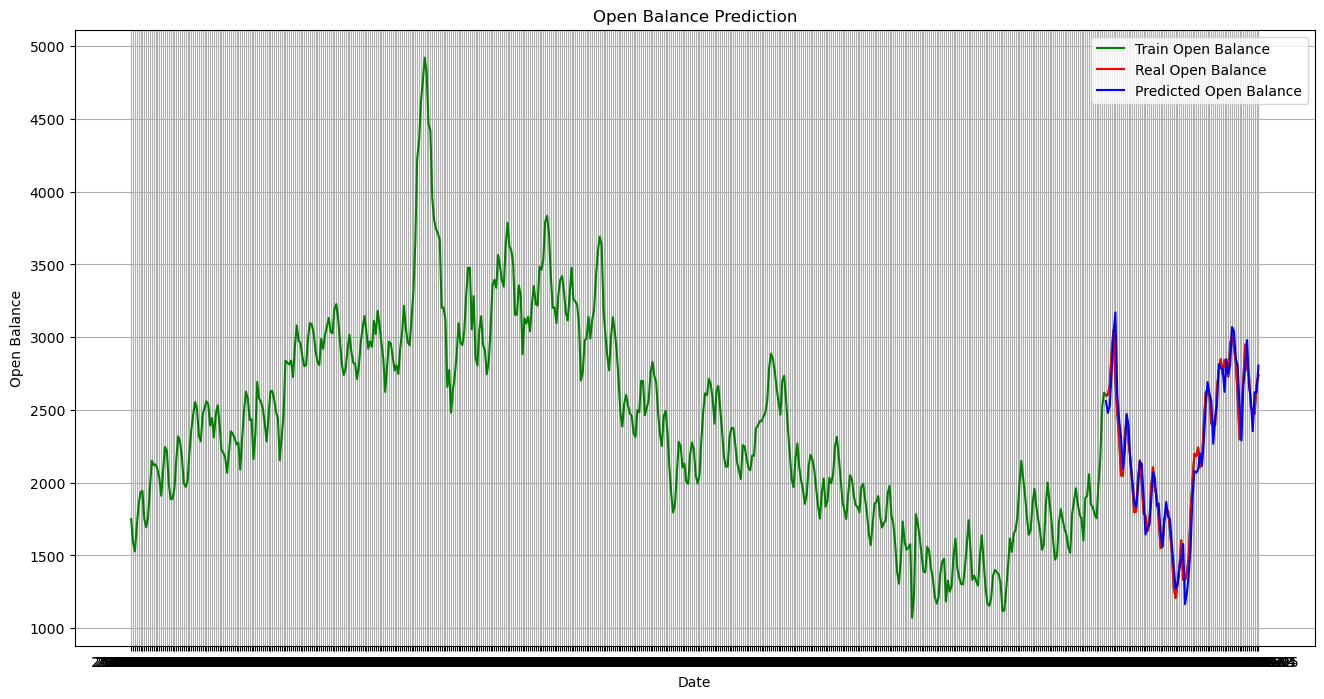

In [18]:
plt.figure(figsize=(16,8))
plt.plot(df_2022_2024.index[-600:], df_2022_2024['Open Balances'].tail(600), color='green', label = 'Train Open Balance')
plt.plot(test_data.index, y, color = 'red', label = 'Real Open Balance')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Open Balance')
plt.title('Open Balance Prediction')
plt.xlabel('Date')
plt.ylabel('Open Balance')
plt.legend()
plt.grid(True)
plt.show()